# Project Title: Laptop Price Prediction for SmartTech Co.

Project Overview:
-----------
SmartTech Co. has partnered with our data science team to develop a robust machine learning model that predicts laptop prices accurately. As the market for laptops continues to expand with a myriad of brands and specifications, having a precise pricing model becomes crucial for both consumers and manufacturers.

Client's Objectives:
----------------------
Accurate Pricing: Develop a model that can accurately predict laptop prices based on various features, helping our clients stay competitive in the market.

Market Positioning: Understand how different features contribute to pricing, enabling SmartTech Co. to strategically position its laptops in the market.

Brand Influence: Assess the impact of brand reputation on pricing, providing insights into brand perception and market demand.

Key Challenges:
------------------------------
Diverse Specifications: The dataset encompasses laptops with diverse specifications. Our challenge is to build a model that generalizes well across a wide range of features.

Real-time Prediction: The model should have the capability to predict prices for newly released laptops, reflecting the fast-paced nature of the tech industry.

Interpretability: It is crucial to make the model interpretable, allowing SmartTech Co. to understand the rationale behind pricing predictions.


About Dataset:
----------------------------

The underlying dataset consist around 1303 records and 13 features. Among the features are the likes of Company, Type, Inches, ScreenResolution, Cpu, Ram, Memory, Gpu, OpSys, Weight, Price and few unnecessary features. The dataset is very raw and requires alot of cleaning and preprocessing.

Project Phases:
----------------------------


1. Data Exploration and Understanding:
    * Import libraries and Load the Dataset.
  
    * Understand the dataset and inspect the data
    

2. Data Preprocessing:

    * Handle missing values, outliers, and encode categorical variables.

    * Ensure the dataset is ready for model training.
  
3. Exploratory Data Analysis:

   * Dive into the dataset to understand the landscape of laptop specifications.

    * Visualize trends in laptop prices and identify potential influential features.

3. Feature Engineering:

    * Extract meaningful features to enhance model performance.

    * Consider creating new features that capture the essence of laptop pricing.

Model Development:
----------------------------

    * Employ machine learning algorithms such as Linear Regression, Random Forest, and Gradient Boosting to predict laptop prices.

    * Evaluate and choose the model that aligns best with the project's objectives.

Hyperparameter Tuning:
----------------------------

    * Fine-tune the selected model to achieve optimal performance.

Real-time Predictions:
----------------------------

    * Implement a mechanism for the model to make predictions for new laptops entering the market. 
    * Compare the predicted price by the Model with any laptop price present in the market.

Interpretability and Insights:
----------------------------

    * Uncover insights into which features play a pivotal role in pricing decisions.

    * Ensure that SmartTech Co. can interpret and trust the model's predictions.

Client Presentation:
----------------------------

    * Present findings, model performance, and insights to SmartTech Co. stakeholders.

    * Address any questions or concerns and gather feedback for potential model improvements.

Expected Outcomes:
-----------------------------
    * A reliable machine learning model capable of predicting laptop prices with high accuracy.

    * Insights into the factors influencing laptop prices, empowering SmartTech Co. in market positioning and strategy.

# Data Exploration and Understanding:
    1. Import libraries and Load the Dataset.
    2. Understand the dataset and inspect the data

In [200]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [201]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Krishnapriya V\Downloads\GINTU ODINSCHOOL STUDY MATERIAL\ML\CAPSTONE PROJECT\laptop.csv") # Prefix the string with an r to indicate that it is a raw string, so Python will not treat backslashes as escape characters.
df.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [202]:
# Check all columns
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Company', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price'],
      dtype='object')

In [203]:
# Total no. of rows and columns
df.shape

(1303, 13)

# Data Preprocessing

1. Handle missing values, outliers, and encode categorical variables.

2. Ensure the dataset is ready for model training.

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [205]:
# Column named "Unnamed: 0" is a unnecessary. So we can drop the column from the dataset.
df.drop(columns=["Unnamed: 0"],inplace=True)

In [206]:
df.columns

Index(['Unnamed: 0.1', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [207]:
# Check Duplicates
df.duplicated().sum()

0

In [208]:
#  Checking if the dataset has any null values in it
df.isnull().sum()

Unnamed: 0.1         0
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [209]:
# Delete nulls
df.dropna(inplace=True)

In [210]:
df.isnull().sum()

Unnamed: 0.1        0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1273 non-null   int64  
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(1), int64(1), object(10)
memory usage: 129.3+ KB


In [212]:
# Changing Datatypes of Inches,Memory,Weight --- to Float.
# Changing Ram dataype to Int

In [213]:
# remove "GB" from RAM
df["Ram"]=df["Ram"].str.replace("GB","")
# converting from string->integer for Ram column
df['Ram'] = df['Ram'].astype('int')

In [214]:
# remove "kg" from Weight
df["Weight"]=df["Weight"].str.replace("kg","")
# Removing the question mark ? found in dataset 
df["Weight"] = df["Weight"].str.replace('?', '') 
# Removing the blank found in dataset with nan
df["Weight"] = df["Weight"].replace('', np.nan)
# converting from string->float for Weight column
df["Weight"] = df["Weight"].astype("float") 
# Filling blank with mean
df["Weight"] = df["Weight"].fillna(df["Weight"].mean())

In [215]:
# Removing the question mark ? found in dataset 
df["Inches"] = df["Inches"].str.replace('?', '') 
# Removing the blank found in dataset with nan
df["Inches"] = df["Inches"].replace('', np.nan)
# converting from string->float for Weight column
df["Inches"] = df["Inches"].astype("float") 
# Filling blank with mean
df["Inches"] = df["Inches"].fillna(df["Inches"].mean())

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1273 non-null   int64  
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   float64
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   int32  
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   float64
 11  Price             1273 non-null   float64
dtypes: float64(3), int32(1), int64(1), object(7)
memory usage: 124.3+ KB


# Exploratory Data Analysis


1. Dive into the dataset to understand the landscape of laptop specifications.

2. Visualize trends in laptop prices and identify potential influential features.

In [217]:
categorical_var = df.select_dtypes(include=['object']).columns
num_var = df.select_dtypes(include = ['int32','int64','float32','float64']).columns

categorical_var,num_var

(Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu',
        'OpSys'],
       dtype='object'),
 Index(['Unnamed: 0.1', 'Inches', 'Ram', 'Weight', 'Price'], dtype='object'))

# 1.  Distribution of Prices:

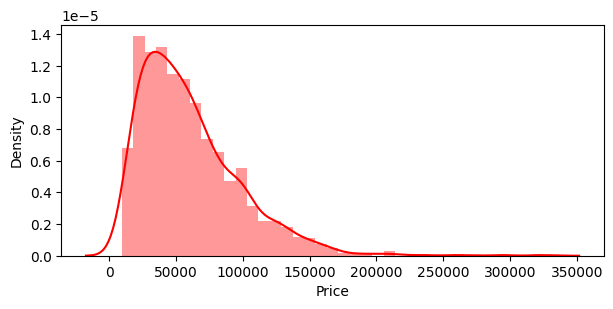

In [218]:
plt.figure(figsize=(7,3))
sns.distplot(df['Price'],color='red')
plt.show()

# Countplot for Categorical variables

<Axes: xlabel='OpSys'>

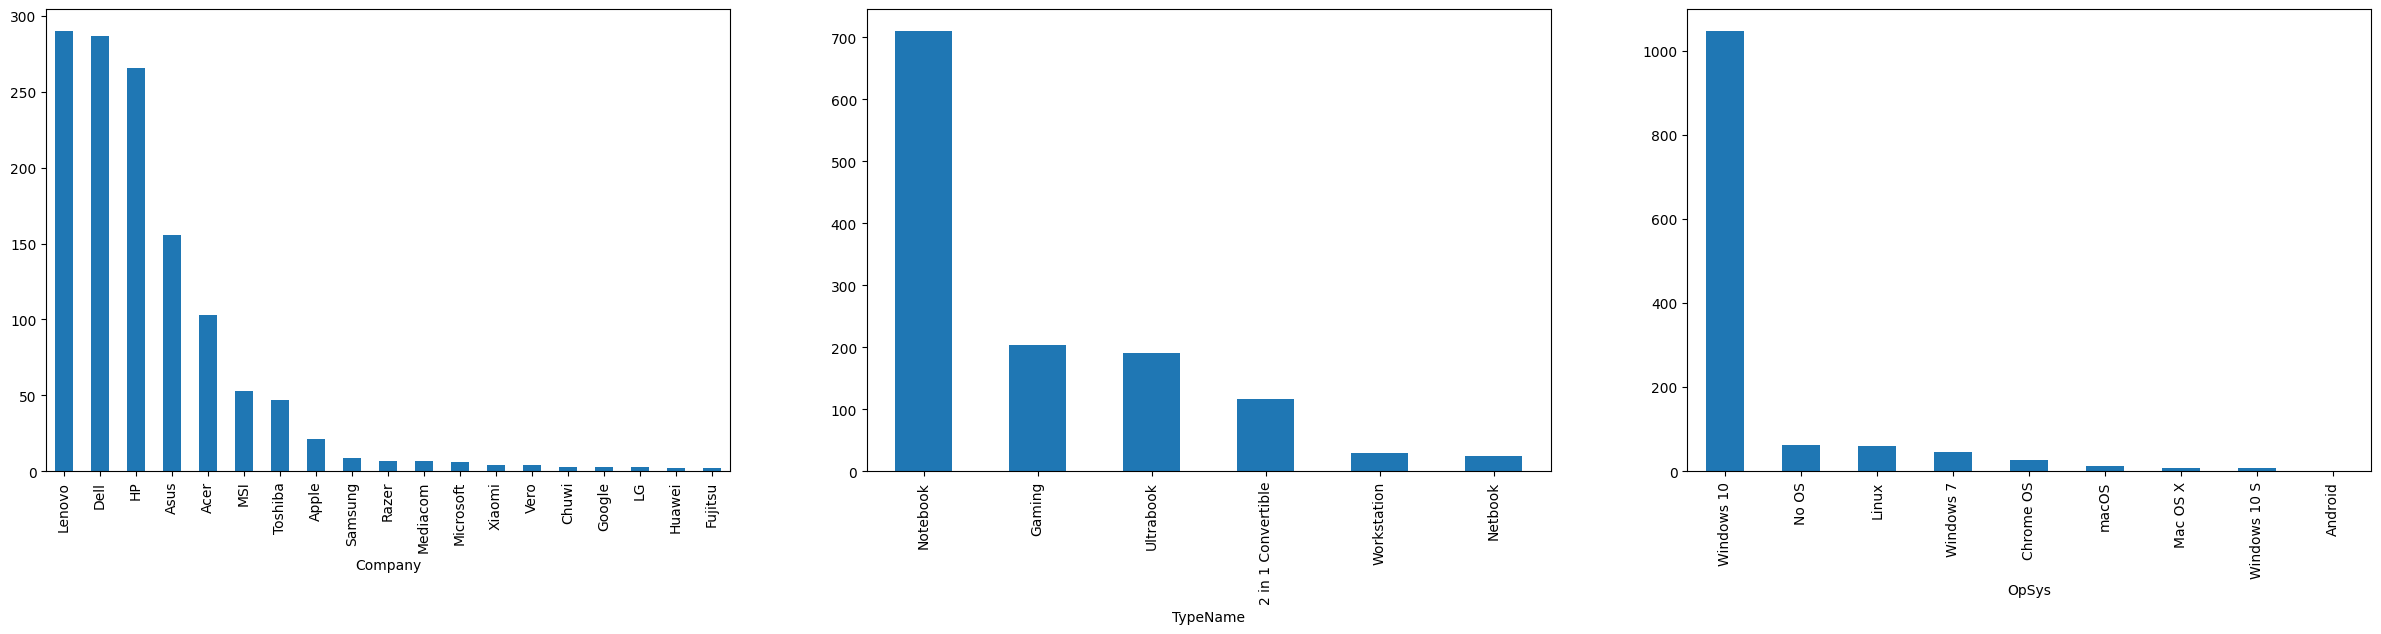

In [219]:
plt.figure(figsize=(30,6))

# Company
plt.subplot(1,3,1)
df["Company"].value_counts().plot(kind="bar")

# TypeName
plt.subplot(1,3,2)
df["TypeName"].value_counts().plot(kind="bar")
#df["TouchScreen"].value_counts().plot(kind="bar", color=['skyblue', 'lightgreen'])

# OpSys
plt.subplot(1,3,3)
df["OpSys"].value_counts().plot(kind="bar")


# 2. Price Trends by Company , Price Trends by Type, Price Trends by OpSys, Price variation for different inches of laptops:

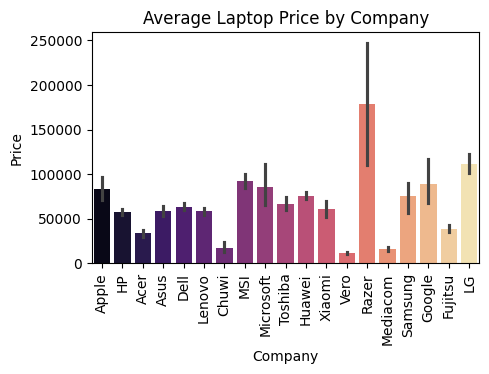

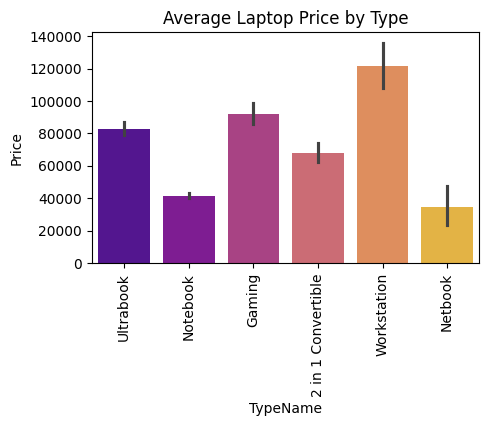

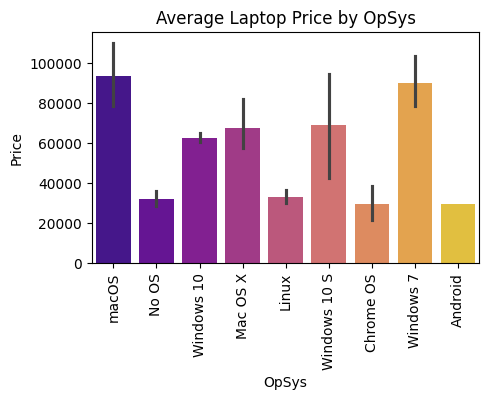

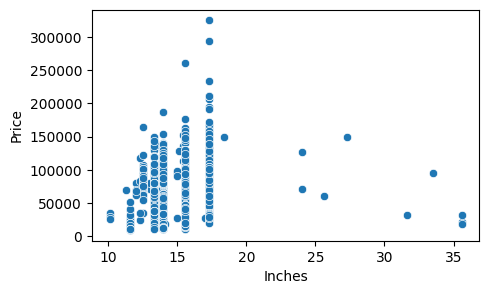

In [220]:
plt.figure(figsize=(5,3))
sns.barplot(x=df["Company"],y=df["Price"], palette='magma')
plt.xticks(rotation="vertical")
plt.title("Average Laptop Price by Company")
plt.show()

plt.figure(figsize=(5,3))
sns.barplot(x=df["TypeName"],y=df["Price"],palette='plasma')
plt.xticks(rotation="vertical")
plt.title("Average Laptop Price by Type")
plt.show()

plt.figure(figsize=(5,3))
sns.barplot(x=df["OpSys"],y=df["Price"],palette='plasma')
plt.xticks(rotation="vertical")
plt.title("Average Laptop Price by OpSys")
plt.show()

plt.figure(figsize=(5,3))
sns.scatterplot(x = df['Inches'],y = df['Price'])
plt.show()

# Feature Engineering:

1. Extract meaningful features to enhance model performance.

2. Consider creating new features that capture the essence of laptop pricing.

# Screen Resolution feature analysis

For the Screen Resolution column we have many types of Screen Resolutions. Touch Screen and IPS Panel are the 2 parts on basis of which we can segregate the column. Again we can segregate resolutions into x-res nd y-res columns

In [221]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                495
1366x768                                         274
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         52
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  14
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
Touchscreen 2560x1440                              6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

Creating new column from ScreenResolution column - Touchscreen,IPS
-------------------------------------------

In [222]:
# Touchscreen column
df['TouchScreen'] = df['ScreenResolution'].apply(lambda element:1 if 'Touchscreen' in element else 0)
# IPS column
df['IPS'] = df['ScreenResolution'].apply(lambda element:1 if "IPS" in element else 0)
df.sample(5)

,Unnamed: 0.1,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
851,851,Asus,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.10,101178.7200,0,0
676,676,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.10,60472.8000,0,0
6,6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016,0,1
1008,1008,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.64,55904.5728,0,0
990,990,HP,Netbook,12.5,Full HD 1920x1080,Intel Core M 6Y75 1.2GHz,8,512GB SSD,Intel HD Graphics 515,Windows 10,0.97,101658.2400,0,0


Countplot for Touchscreen, IPS laptops
---------------------------------

<Axes: xlabel='IPS'>

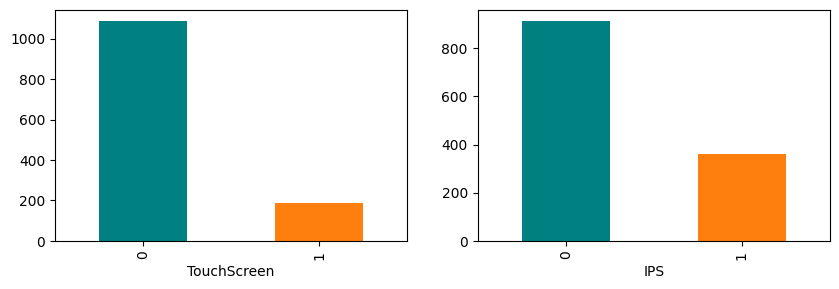

In [223]:
plt.figure(figsize=(10,3))
# Countplot for Touchscreen laptops
plt.subplot(1,2,1)
df["TouchScreen"].value_counts().plot(kind="bar", color=['teal', '#ff7f0e'])

# Countplot for IPS laptops
plt.subplot(1,2,2)
df["IPS"].value_counts().plot(kind="bar", color=['teal', '#ff7f0e'])

Barplot - Price variation on Touch screen, IPS laptops
---------------------------------------

([0, 1], [Text(0, 0, '0'), Text(1, 0, '1')])

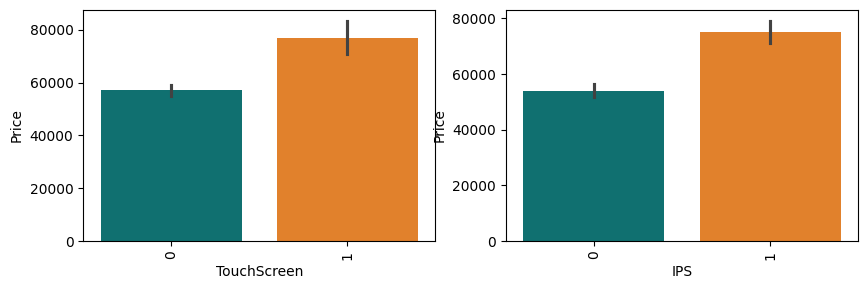

In [224]:
plt.figure(figsize=(10,3))
colors=['teal', '#ff7f0e']

# Barplot - Price variation on Touch screen laptops
plt.subplot(1,2,1)
sns.barplot(x = df['TouchScreen'],y = df['Price'],palette=colors)
plt.xticks(rotation = 'vertical')

# Barplot - Price variation with respect to IPS laptops
plt.subplot(1,2,2)
sns.barplot(x = df['IPS'],y = df['Price'],palette=colors)
plt.xticks(rotation = 'vertical')

Extracting the X Resolution and the Y Resolution from ScreenResolution
----------------------------------

In [225]:
df["ScreenResolution"].str.split("x")

0               [IPS Panel Retina Display 2560, 1600]
1                                         [1440, 900]
2                                [Full HD 1920, 1080]
3               [IPS Panel Retina Display 2880, 1800]
4               [IPS Panel Retina Display 2560, 1600]
                            ...                      
1298     [IPS Panel Full HD / Touchscreen 1920, 1080]
1299    [IPS Panel Quad HD+ / Touchscreen 3200, 1800]
1300                                      [1366, 768]
1301                                      [1366, 768]
1302                                      [1366, 768]
Name: ScreenResolution, Length: 1273, dtype: object

In [226]:
temp= df["ScreenResolution"].str.split("x",n=1,expand=True)

In [227]:
df["X_res"]=temp[0]
df["Y_res"]=temp[1]

In [228]:
df.head(3)

,Unnamed: 0.1,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080


In [229]:
# X_res col,we need to extract the digits from it,using regexp
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [230]:
df.head(3)

,Unnamed: 0.1,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080


In [231]:
# Changing datatype of X_res,Y_res from object to int32
df["X_res"] = df["X_res"].astype("int")
df["Y_res"] = df["Y_res"].astype("int")

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1273 non-null   int64  
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   float64
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   int32  
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   float64
 11  Price             1273 non-null   float64
 12  TouchScreen       1273 non-null   int64  
 13  IPS               1273 non-null   int64  
 14  X_res             1273 non-null   int32  
 15  Y_res             1273 non-null   int32  
dtypes: float64(3), int32(3), int64(3), object(7)
me

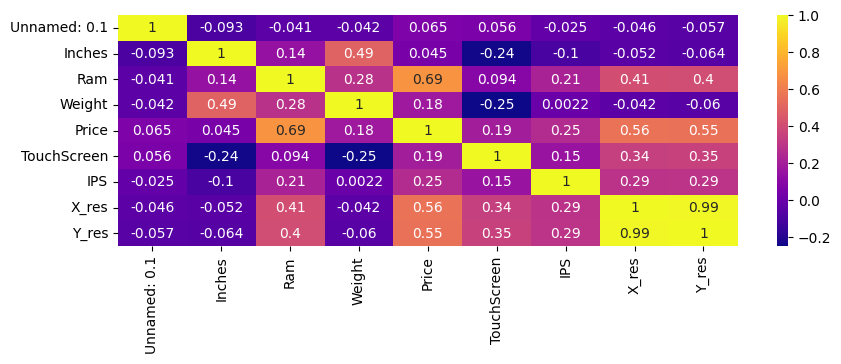

In [233]:
# Correlation between all numeric features
# Filter only numeric columns
numeric_df = df.select_dtypes(include=['number'])
# Create the heatmap
plt.figure(figsize=(10,3))
sns.heatmap(numeric_df.corr(), annot=True, cmap='plasma')
plt.show()

Creating PPI(pixels per inch) column to combine X_res and Y_res with Inches
------------------------------

In [234]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

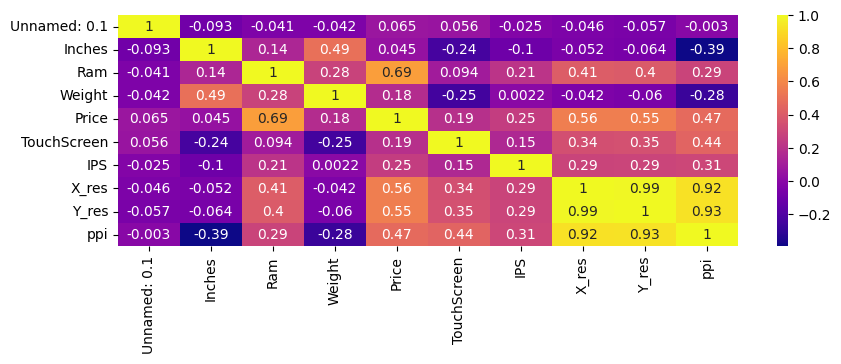

In [235]:
# Filter only numeric columns
numeric_df = df.select_dtypes(include=['number'])
# Create the heatmap After adding PPI
plt.figure(figsize=(10,3))
sns.heatmap(numeric_df.corr(), annot=True, cmap='plasma')
plt.show()

In [236]:
df.drop(columns=["ScreenResolution","X_res","Y_res","Inches"],inplace=True)

In [237]:
df.head()

,Unnamed: 0.1,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi
0,0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


# 2. CPU feature analysis

In [238]:
df["Cpu"].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz     183
Intel Core i7 7700HQ 2.8GHz    142
Intel Core i7 7500U 2.7GHz     128
Intel Core i7 8550U 1.8GHz      72
Intel Core i5 8250U 1.6GHz      68
                              ... 
AMD A9-Series 9420 2.9GHz        1
Intel Core i7 2.2GHz             1
AMD A6-Series 7310 2GHz          1
Intel Atom Z8350 1.92GHz         1
AMD E-Series 9000e 1.5GHz        1
Name: count, Length: 118, dtype: int64

In [239]:
# Extract Preprocessor names
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [240]:
df.head()

,Unnamed: 0.1,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu Name
0,0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [241]:
# segregating  Intel Core i7,Intel Core i5 ,Intel Core i3, other Intel preprocessor, AMD Processor
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'


In [242]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [243]:
df.head(20)

,Unnamed: 0.1,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu Name,Cpu brand
0,0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5
5,5,Acer,Notebook,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,21312.0000,0,0,100.454670,AMD A9-Series 9420,AMD Processor
6,6,Apple,Ultrabook,Intel Core i7 2.2GHz,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016,0,1,220.534624,Intel Core i7,Intel Core i7
7,7,Apple,Ultrabook,Intel Core i5 1.8GHz,8,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,61735.5360,0,0,127.677940,Intel Core i5,Intel Core i5
8,8,Asus,Ultrabook,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Nvidia GeForce MX150,Windows 10,1.30,79653.6000,0,0,157.350512,Intel Core i7,Intel Core i7
9,9,Acer,Ultrabook,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.60,41025.6000,0,1,157.350512,Intel Core i5,Intel Core i5


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD Processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Other Intel Processor')])

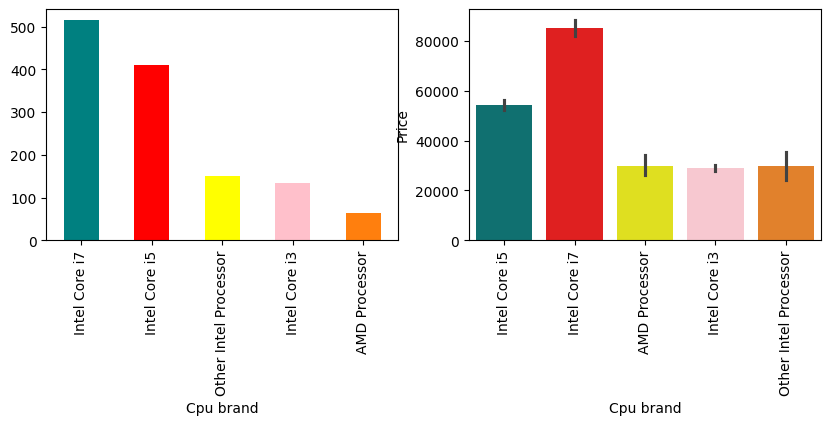

In [244]:
plt.figure(figsize=(10,3))
# Barplot for CPU brands
plt.subplot(1,2,1)
df['Cpu brand'].value_counts().plot(kind="bar", color=['teal', 'red','yellow','pink','#ff7f0e'])

# Countplot for CPU brands
colors=['teal', 'red','yellow','pink','#ff7f0e']
plt.subplot(1,2,2)
sns.barplot(x=df['Cpu brand'],y=df['Price'],palette=colors)
plt.xticks(rotation='vertical')

In [245]:
# drop the old CPU , Cpu Name columns from the dataset now
df.drop(columns=['Cpu','Cpu Name'],inplace=True)
df.head()

,Unnamed: 0.1,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu brand
0,0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


# 3. RAM feature analysis

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '4'),
  Text(3, 0, '6'),
  Text(4, 0, '8'),
  Text(5, 0, '12'),
  Text(6, 0, '16'),
  Text(7, 0, '24'),
  Text(8, 0, '32'),
  Text(9, 0, '64')])

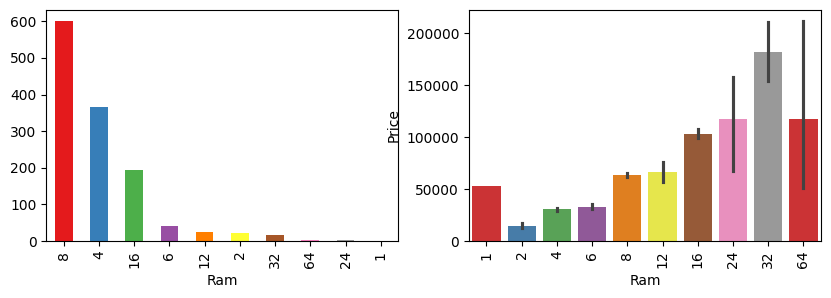

In [246]:
plt.figure(figsize=(10,3))
# Barplot for RAM
plt.subplot(1,2,1)
df['Ram'].value_counts().plot(kind='bar', color=sns.color_palette('Set1', len(df['Ram'].value_counts())))

# Countplot for RAM
plt.subplot(1,2,2)
sns.barplot(x=df['Ram'],y=df['Price'], palette='Set1')
plt.xticks(rotation='vertical')

# 4. MEMORY feature analysis

In [247]:
df['Memory'].value_counts()

Memory
256GB SSD                        401
1TB HDD                          217
500GB HDD                        130
512GB SSD                        116
128GB SSD +  1TB HDD              92
128GB SSD                         74
256GB SSD +  1TB HDD              71
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                14
512GB SSD +  1TB HDD              14
1TB SSD                           13
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          4
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
128GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [248]:
'''
# We will replace the word GB with ""
# We will replace the word TB with "000"
# We will split the word across the "+" character
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

# We will strip up all the white spaces, basically eliminating white spaces
df["first"]= new[0]
df["first"]=df["first"].str.strip()


# Creating Layer1 column for each memory type
df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# remove all the character and just keeping the numbers
df['first'] = df['first'].str.replace(r'\D', '')

# Creating Layer 2 column for each memory type
df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# remove all the character and just keeping the numbers
df['second'] = df['second'].str.replace(r'\D', '')


# Changing datatype of first,second from object to int32
df["first"] = df["first"].astype('int')
df["second"] = df["second"].astype('int')

# Multiplying the elements and storing in subsequent columns
df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

# Dropping unecessary columns now
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)
       
df.head()
'''


import pandas as pd
import numpy as np

# Sample DataFrame (replace this with your actual DataFrame)
# df = pd.DataFrame({'Memory': ['128GB SSD', '256GB HDD + 128GB SSD', '1TB Hybrid']})

# Convert Memory column to string and remove unnecessary characters
df['Memory'] = df['Memory'].astype(str)
df['Memory'] = df['Memory'].replace('\.0', '', regex=True)
df['Memory'] = df['Memory'].str.replace('GB', '')
df['Memory'] = df['Memory'].str.replace('TB', '000')
new = df['Memory'].str.split('+', n=1, expand=True)

# Extract the first and second parts
df['first'] = new[0].str.strip()
df['second'] = new[1].fillna("0").str.strip()

# Create Layer1 columns
df['Layer1HDD'] = df['first'].apply(lambda x: 1 if "HDD" in x else 0)
df['Layer1SSD'] = df['first'].apply(lambda x: 1 if "SSD" in x else 0)
df['Layer1Hybrid'] = df['first'].apply(lambda x: 1 if "Hybrid" in x else 0)
df['Layer1Flash_Storage'] = df['first'].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Remove non-numeric characters from first
df['first'] = df['first'].str.replace(r'\D', '', regex=True)
df['first'] = pd.to_numeric(df['first'], errors='coerce').fillna(0).astype(int)

# Create Layer2 columns
df['Layer2HDD'] = df['second'].apply(lambda x: 1 if "HDD" in x else 0)
df['Layer2SSD'] = df['second'].apply(lambda x: 1 if "SSD" in x else 0)
df['Layer2Hybrid'] = df['second'].apply(lambda x: 1 if "Hybrid" in x else 0)
df['Layer2Flash_Storage'] = df['second'].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Remove non-numeric characters from second
df['second'] = df['second'].str.replace(r'\D', '', regex=True)
df['second'] = pd.to_numeric(df['second'], errors='coerce').fillna(0).astype(int)

# Calculate memory values
df['HDD'] = (df['first'] * df['Layer1HDD'] + df['second'] * df['Layer2HDD'])
df['SSD'] = (df['first'] * df['Layer1SSD'] + df['second'] * df['Layer2SSD'])
df['Hybrid'] = (df['first'] * df['Layer1Hybrid'] + df['second'] * df['Layer2Hybrid'])
df['Flash_Storage'] = (df['first'] * df['Layer1Flash_Storage'] + df['second'] * df['Layer2Flash_Storage'])

# Drop unnecessary columns
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1Flash_Storage',
                  'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', 'Layer2Flash_Storage'], inplace=True)

# Display the cleaned DataFrame
df.head()


,Unnamed: 0.1,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [249]:
df.head()

,Unnamed: 0.1,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0.1   1273 non-null   int64  
 1   Company        1273 non-null   object 
 2   TypeName       1273 non-null   object 
 3   Ram            1273 non-null   int32  
 4   Memory         1273 non-null   object 
 5   Gpu            1273 non-null   object 
 6   OpSys          1273 non-null   object 
 7   Weight         1273 non-null   float64
 8   Price          1273 non-null   float64
 9   TouchScreen    1273 non-null   int64  
 10  IPS            1273 non-null   int64  
 11  ppi            1273 non-null   float64
 12  Cpu brand      1273 non-null   object 
 13  HDD            1273 non-null   int64  
 14  SSD            1273 non-null   int64  
 15  Hybrid         1273 non-null   int64  
 16  Flash_Storage  1273 non-null   int64  
dtypes: float64(3), int32(1), int64(7), object(6)
memory usage

In [251]:
# drop unnecessary Memory column
df.drop(columns=['Memory'],inplace=True)

# Correlation check for price

In [252]:
# Filter only numeric columns
numeric_df = df.select_dtypes(include=['number'])
numeric_df.corr()['Price']

Unnamed: 0.1     0.065403
Ram              0.685648
Weight           0.175913
Price            1.000000
TouchScreen      0.188994
IPS              0.254851
ppi              0.468783
HDD             -0.095394
SSD              0.668416
Hybrid           0.007843
Flash_Storage   -0.038332
Name: Price, dtype: float64

In [253]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [254]:
df.head()

,Unnamed: 0.1,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu brand,HDD,SSD
0,0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


# 5. Feature Analysis on GPU

In [255]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      271
Intel HD Graphics 520      181
Intel UHD Graphics 620      66
Nvidia GeForce GTX 1050     64
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

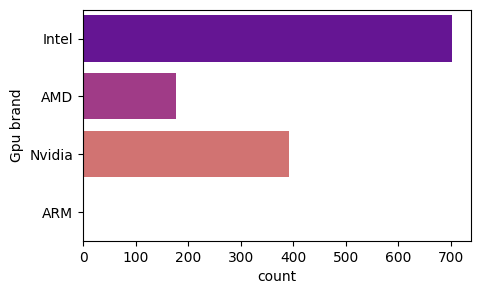

In [256]:
# Extract GPU brand column
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

plt.figure(figsize=(5, 3))
sns.countplot(df['Gpu brand'],palette='plasma')
plt.show()

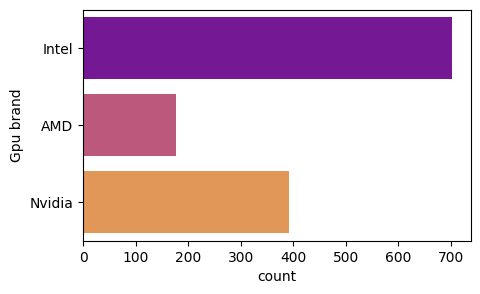

In [257]:
# Removing ARM Tuple
df = df[df['Gpu brand'] != 'ARM']

plt.figure(figsize=(5, 3))
sns.countplot(df['Gpu brand'],palette='plasma')
plt.show()

In [258]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     703
Nvidia    393
AMD       176
Name: count, dtype: int64

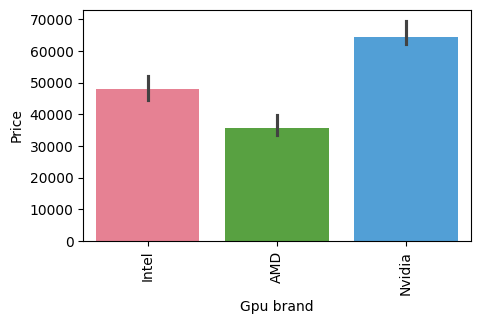

In [259]:
# Outliers Check
plt.figure(figsize=(5, 3))
sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median, palette = sns.color_palette('husl', n_colors=df['Gpu brand'].nunique()))
plt.xticks(rotation='vertical')
plt.show()
# no outliers found

In [260]:
# drop the old GPU column
df.drop(columns=['Gpu'],inplace=True)
df.head()

,Unnamed: 0.1,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand
0,0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


# 6. Operating System Feature Analysis

In [261]:
df['OpSys'].value_counts()

OpSys
Windows 10      1047
No OS             63
Linux             61
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: count, dtype: int64

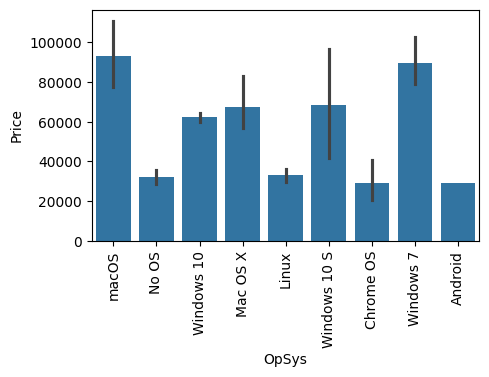

In [262]:
# Barplot for OpSys
plt.figure(figsize=(5, 3))
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [263]:
# Segregating  OS types
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'
df['os'] = df['OpSys'].apply(cat_os)

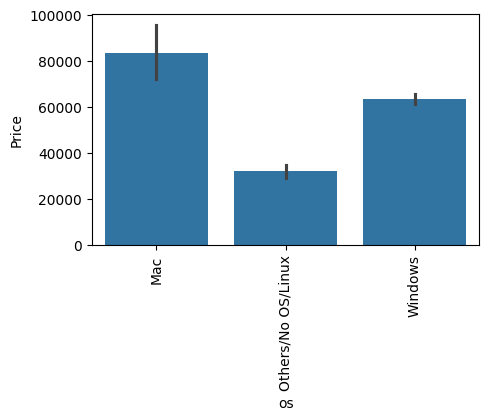

In [264]:
# Barplot - Price variation on OS types
plt.figure(figsize=(5, 3))
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [265]:
# Drop old OpSys column
df.drop(columns=['OpSys'],inplace=True)
df.head()

,Unnamed: 0.1,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


# 7. WEIGHT column Analysis

<Axes: xlabel='Weight', ylabel='Density'>

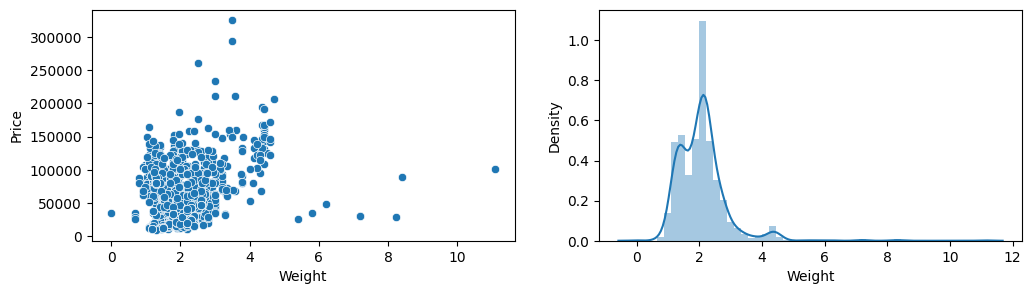

In [266]:
plt.figure(figsize=(12,3))
# Countplot for Touchscreen laptops
plt.subplot(1,2,1)
sns.scatterplot(x=df['Weight'],y=df['Price'])
plt.subplot(1,2,2)
sns.distplot(df['Weight'])
# Weight more than 2 kg has max price and highest Density

# Correlation with price 

In [267]:
# Filter only numeric columns
numeric_df = df.select_dtypes(include=['number'])
numeric_df.corr()['Price']

Unnamed: 0.1    0.066217
Ram             0.685521
Weight          0.175433
Price           1.000000
TouchScreen     0.190738
IPS             0.255987
ppi             0.470701
HDD            -0.095855
SSD             0.668271
Name: Price, dtype: float64

<Axes: >

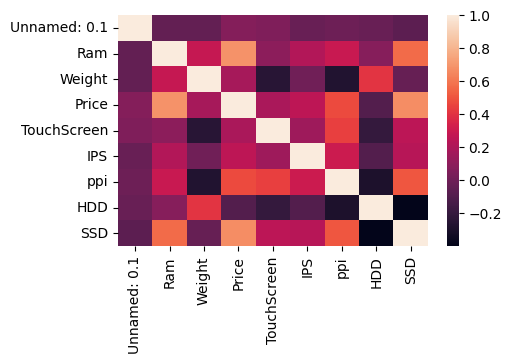

In [268]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(5,3))
sns.heatmap(numeric_df.corr())

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1272 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  1272 non-null   int64  
 1   Company       1272 non-null   object 
 2   TypeName      1272 non-null   object 
 3   Ram           1272 non-null   int32  
 4   Weight        1272 non-null   float64
 5   Price         1272 non-null   float64
 6   TouchScreen   1272 non-null   int64  
 7   IPS           1272 non-null   int64  
 8   ppi           1272 non-null   float64
 9   Cpu brand     1272 non-null   object 
 10  HDD           1272 non-null   int64  
 11  SSD           1272 non-null   int64  
 12  Gpu brand     1272 non-null   object 
 13  os            1272 non-null   object 
dtypes: float64(3), int32(1), int64(5), object(5)
memory usage: 144.1+ KB


<Axes: xlabel='Price', ylabel='Density'>

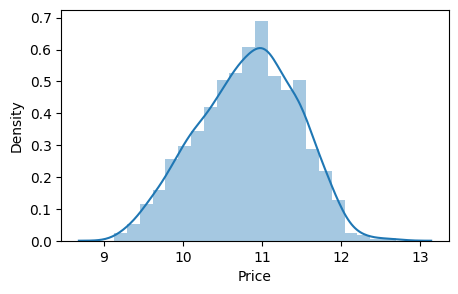

In [270]:
plt.figure(figsize=(5,3))
sns.distplot(np.log(df['Price']))

# Model Development:

1. Employ machine learning algorithms such as Linear Regression, Random Forest, and Gradient Boosting to predict laptop prices.

2. Evaluate and choose the model that aligns best with the project's objectives.

In [271]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [272]:
# Define features (X) and target (y)
X = df.drop(columns=['Price'])   # X = df.drop('Price', axis=1)
y = np.log(df['Price'])

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [273]:
X

,Unnamed: 0.1,Company,TypeName,Ram,Weight,TouchScreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [274]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1272, dtype: float64

#  Linear Regression Model

In [275]:
# Step 1: Drop Unnecessary Column
#df = df.drop(columns=['Unnamed: 0.1'])

# Step 2: Define features (X) and target (y)
#X = df.drop(columns=['Price'])  # Features
#y = df['Price']  # Target

# Step 3: Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Define the ColumnTransformer for categorical features
categorical_features = ['Company','TypeName', 'Cpu brand', 'Gpu brand', 'os']
column_transformer = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(sparse_output=False, drop='first'), categorical_features)
], remainder='passthrough')

# Step 5: Create the pipeline with Linear Regression
lr_model = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('model', LinearRegression())
])

# Step 6: Fit the model
lr_model.fit(X_train, y_train)

# Step 7: Predict on the test data
y_pred = lr_model.predict(X_test)

# Step 8: Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R2 score:', r2)
print('MAE:', mae)


R2 score: 0.8127162100282171
MAE: 0.20688992625397823


# Random Forest Model

In [276]:
'''
# Step 2: Define features (X) and target (y)
X = df.drop(columns=['Price'])  # Features
y = df['Price']  # Target

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
'''

# Step 4: Define the ColumnTransformer for categorical features
categorical_features = ['Company', 'TypeName', 'Cpu brand', 'Gpu brand', 'os']
column_transformer = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(sparse_output=False, drop='first'), categorical_features)
], remainder='passthrough')

# Step 5: Create the pipeline with Random Forest
rf_model = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Step 6: Fit the model
rf_model.fit(X_train, y_train)

# Step 7: Predict on the test data
y_pred = rf_model.predict(X_test)

# Step 8: Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R2 score:', r2)
print('MAE:', mae)


R2 score: 0.8838743062294796
MAE: 0.1609287210298638


# Gradient Boosting Model

In [277]:
'''
# Step 2: Define features (X) and target (y)
X = df.drop(columns=['Price'])  # Features
y = df['Price']  # Target

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
'''
# Step 4: Define the ColumnTransformer for categorical features
categorical_features = ['Company', 'TypeName', 'Cpu brand', 'Gpu brand', 'os']
column_transformer = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(sparse_output=False, drop='first'), categorical_features)
], remainder='passthrough')

# Step 5: Create the pipeline with Gradient Boosting
gb_model = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('model', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
])

# Step 6: Fit the model
gb_model.fit(X_train, y_train)

# Step 7: Predict on the test data
y_pred = gb_model.predict(X_test)

# Step 8: Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R2 score:', r2)
print('MAE:', mae)


R2 score: 0.8985725473174524
MAE: 0.15644950419743797


# KNN Model

In [278]:

from sklearn.preprocessing import OneHotEncoder, StandardScaler

'''
# Step 2: Define features (X) and target (y)
X = df.drop(columns=['Price'])  # Features
y = df['Price']  # Target

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
'''
# Step 4: Define the ColumnTransformer for categorical features
categorical_features = ['Company', 'TypeName', 'Cpu brand', 'Gpu brand', 'os']
column_transformer = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(sparse_output=False, drop='first'), categorical_features)
], remainder='passthrough')

# Step 5: Create the pipeline with KNN
knn_model = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('scaler', StandardScaler()),  # Standardizing the data for KNN
    ('model', KNeighborsRegressor(n_neighbors=5))
])

# Step 6: Fit the model
knn_model.fit(X_train, y_train)

# Step 7: Predict on the test data
y_pred = knn_model.predict(X_test)

# Step 8: Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R2 score:', r2)
print('MAE:', mae)


R2 score: 0.7833820961719491
MAE: 0.21929524831552835


# Decision Tree Model

In [279]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
''''
# Define features (X) and target (y)
X = df.drop(columns=['Price'])  # Features
y = df['Price']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
'''

# Define the ColumnTransformer for categorical features
categorical_features = ['Company', 'TypeName', 'Cpu brand', 'Gpu brand', 'os']
column_transformer = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(sparse_output=False, drop='first'), categorical_features)
], remainder='passthrough')

# Create the pipeline with Decision Tree
dt_model = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('scaler', StandardScaler()),  # Standardizing the data, though it's less critical for Decision Trees
    ('model', DecisionTreeRegressor())
])

# Fit the model
dt_model.fit(X_train, y_train)

# Predict on the test data
y_pred = dt_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R2 score:', r2)
print('MAE:', mae)


R2 score: 0.7624256782183908
MAE: 0.23140038888375353


# Observations
Random Forest Model and Gradient Boosting Models  give the best R2 score, It is same for both models.

R2 score: 0.8870095608931132

MAE(Mean Absolute Error): 0.16442898301630438

# Hyperparameter Tuning:

Fine-tune the selected model to achieve optimal performance.

In [280]:
from sklearn.model_selection import GridSearchCV
# Define the ColumnTransformer for categorical features
categorical_features = ['Company', 'TypeName', 'Cpu brand', 'Gpu brand', 'os']
column_transformer = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(sparse_output=False, drop='first'), categorical_features)
], remainder='passthrough')

# Define the pipeline without the model
rf_model = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('model', RandomForestRegressor(random_state=42))
])
param_grid = {
    'model__n_estimators': [50, 100, 200],         # Number of trees in the forest
    'model__max_depth': [None, 10, 20, 30],        # Maximum depth of the tree
    'model__min_samples_split': [2, 5, 10],        # Minimum number of samples required to split an internal node
    'model__min_samples_leaf': [1, 2, 4]           # Minimum number of samples required to be at a leaf node
}
# Set up GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)
# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Predict using the best model
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R2 score:', r2)
print('MAE:', mae)


Best parameters found:  {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 50}
R2 score: 0.8839685772504111
MAE: 0.16132459415816733


# Interpretability and Insights found:
1. Based on the analysis and model you developed, the features that appear to have the most significant impact on laptop prices are:
CPU Brand,RAM,Storage (SSD vs HDD),GPU
Brand,Screen Size and Resolution (PPI),Operating System.
3. The best suited ML model to predict laptop prices are-  Random Forest and Gradient Boost where both gave same result
   
    R2 score: 0.8791921662492554
   
    MAE: 0.16437413878948717


# Real-time Predictions for new laptops:

Implement a mechanism for the Random Forest model(best suited) to make predictions for new laptops entering the market.

In [281]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd
import numpy as np


# Example data and preprocessing pipeline
categorical_features = ['Company', 'TypeName', 'Cpu brand', 'Gpu brand', 'os']
numerical_features = ['Ram', 'Weight', 'TouchScreen', 'IPS', 'ppi', 'HDD', 'SSD']

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Create a pipeline with preprocessing and model
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor())
])


# Example training data (assuming df_train is your training DataFrame and 'Price' is the target)
X_train = df.drop(columns=['Price'])
y_train = np.log(df['Price'])

# Fit the pipeline
rf_model.fit(X_train, y_train)

# Example usage with new data
new_laptop = {
    'Company': 'Lenovo',
    'TypeName': 'Gaming',
    'Ram': 32,
    'Weight': 2.5,
    'TouchScreen': 0,
    'IPS': 1,
    'ppi': 250,
    'Cpu brand': 'Intel Core i5',
    'HDD': 0,
    'SSD': 1000,
    'Gpu brand': 'Nvidia',
    'os': 'Windows'
}

# Convert the new laptop data to a DataFrame
new_laptop_df = pd.DataFrame([new_laptop])

# Predict the price using the fitted pipeline
predicted_price_log = rf_model.predict(new_laptop_df)

# Convert the predicted price back to the original scale
predicted_price = np.exp(predicted_price_log)[0]

print("Predicted Price for new laptop=", predicted_price)


Predicted Price for new laptop= 159319.54111948347


# GRADIO APP-User Interface

In [284]:
import gradio as gr
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Assuming 'df' is your preprocessed DataFrame and 'rf_model' is your trained Random Forest model
# If not, replace with your actual DataFrame and model

# Define the input components for Gradio
inputs = [
    gr.Dropdown(choices=df['Company'].unique().tolist(), label="Company"),
    gr.Dropdown(choices=df['TypeName'].unique().tolist(), label="TypeName"),
    gr.Slider(minimum=4, maximum=64, step=4, label="Ram (GB)"),
    gr.Slider(minimum=1.0, maximum=4.0, step=0.1, label="Weight (kg)"),
    gr.Checkbox(label="TouchScreen"),
    gr.Checkbox(label="IPS"),
    gr.Slider(minimum=100, maximum=400, step=10, label="PPI"),
    gr.Dropdown(choices=df['Cpu brand'].unique().tolist(), label="Cpu brand"),
    gr.Slider(minimum=0, maximum=2000, step=100, label="HDD (GB)"),
    gr.Slider(minimum=0, maximum=2000, step=100, label="SSD (GB)"),
    gr.Dropdown(choices=df['Gpu brand'].unique().tolist(), label="Gpu brand"),
    gr.Dropdown(choices=df['os'].unique().tolist(), label="Operating System")
]

# Define the prediction function
def predict_price(Company, TypeName, Ram, Weight, TouchScreen, IPS, ppi, Cpu_brand, HDD, SSD, Gpu_brand, os):
    # Create a DataFrame from the input values
    input_data = pd.DataFrame({
        'Company': [Company],
        'TypeName': [TypeName],
        'Ram': [Ram],
        'Weight': [Weight],
        'TouchScreen': [TouchScreen],
        'IPS': [IPS],
        'ppi': [ppi],
        'Cpu brand': [Cpu_brand],
        'HDD': [HDD],
        'SSD': [SSD],
        'Gpu brand': [Gpu_brand],
        'os': [os]
    })

    # Predict the price using the trained model
    predicted_price_log = rf_model.predict(input_data)
    predicted_price = np.exp(predicted_price_log)[0]

    return f"Predicted Price: Rs.{predicted_price:.2f}"

# Create the Gradio interface
output = gr.Textbox(label="Predicted Price")
interface = gr.Interface(fn=predict_price, inputs=inputs, outputs=output)

# Create a Blocks interface with custom CSS (set background to blue and text color to white)
block = gr.Blocks(css="""
    body {
        background-color: skyblue;
        color: white;
    }
    .gradio-container {
        background-color: skyblue;
    }
    .gradio-container input, .gradio-container select, .gradio-container .gr-button {
        background-color: red;
        color: white;
    }
    .gradio-container .gr-button:hover {
        background-color: skyblue;
        color: white;
    }
""")

# Add your components to the Blocks interface
with block:
    interface.render()

# Launch the interface
block.launch(share=True)


Running on local URL:  http://127.0.0.1:7877

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


# Results of Model

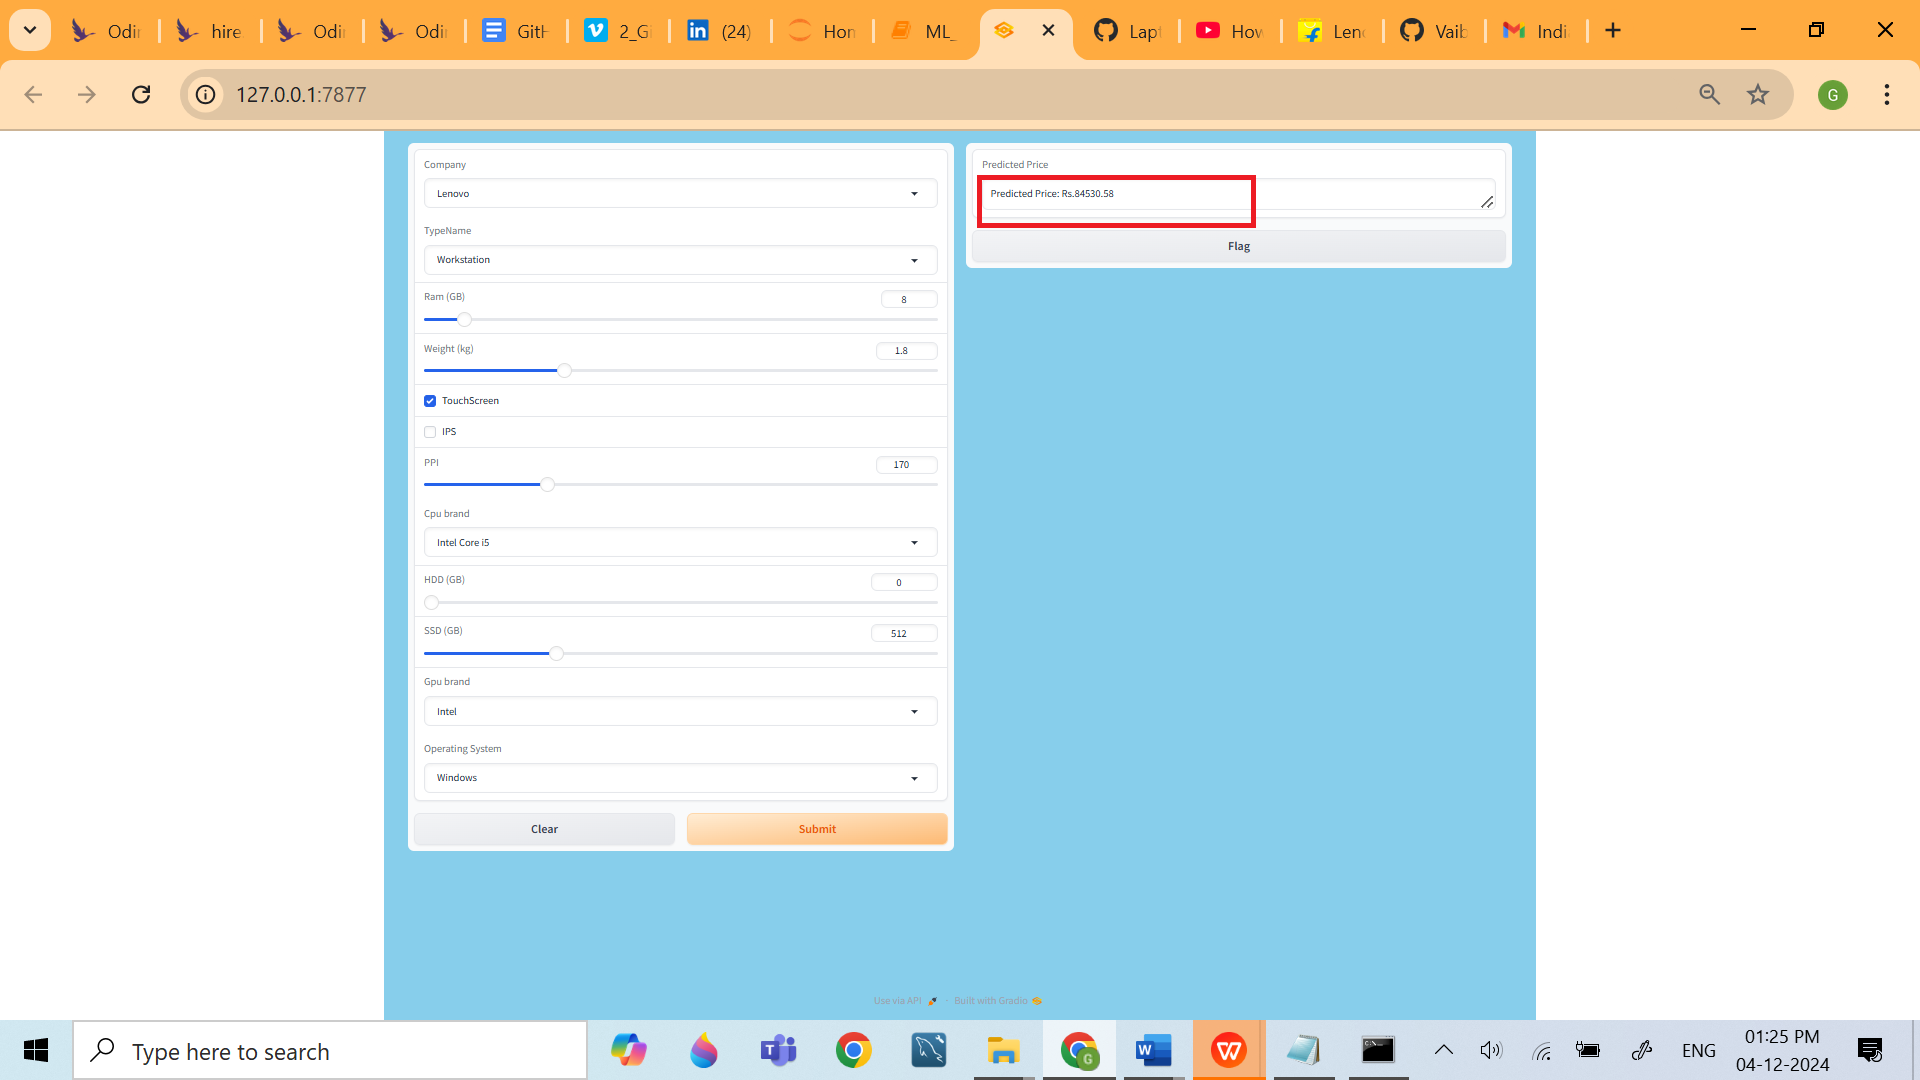

In [4]:
from IPython.display import Image
Image(filename=r'C:\Users\Krishnapriya V\Downloads\GINTU ODINSCHOOL STUDY MATERIAL\ML\CAPSTONE PROJECT\ML_CAPSTONE_PROJECT\Untitled1.png')

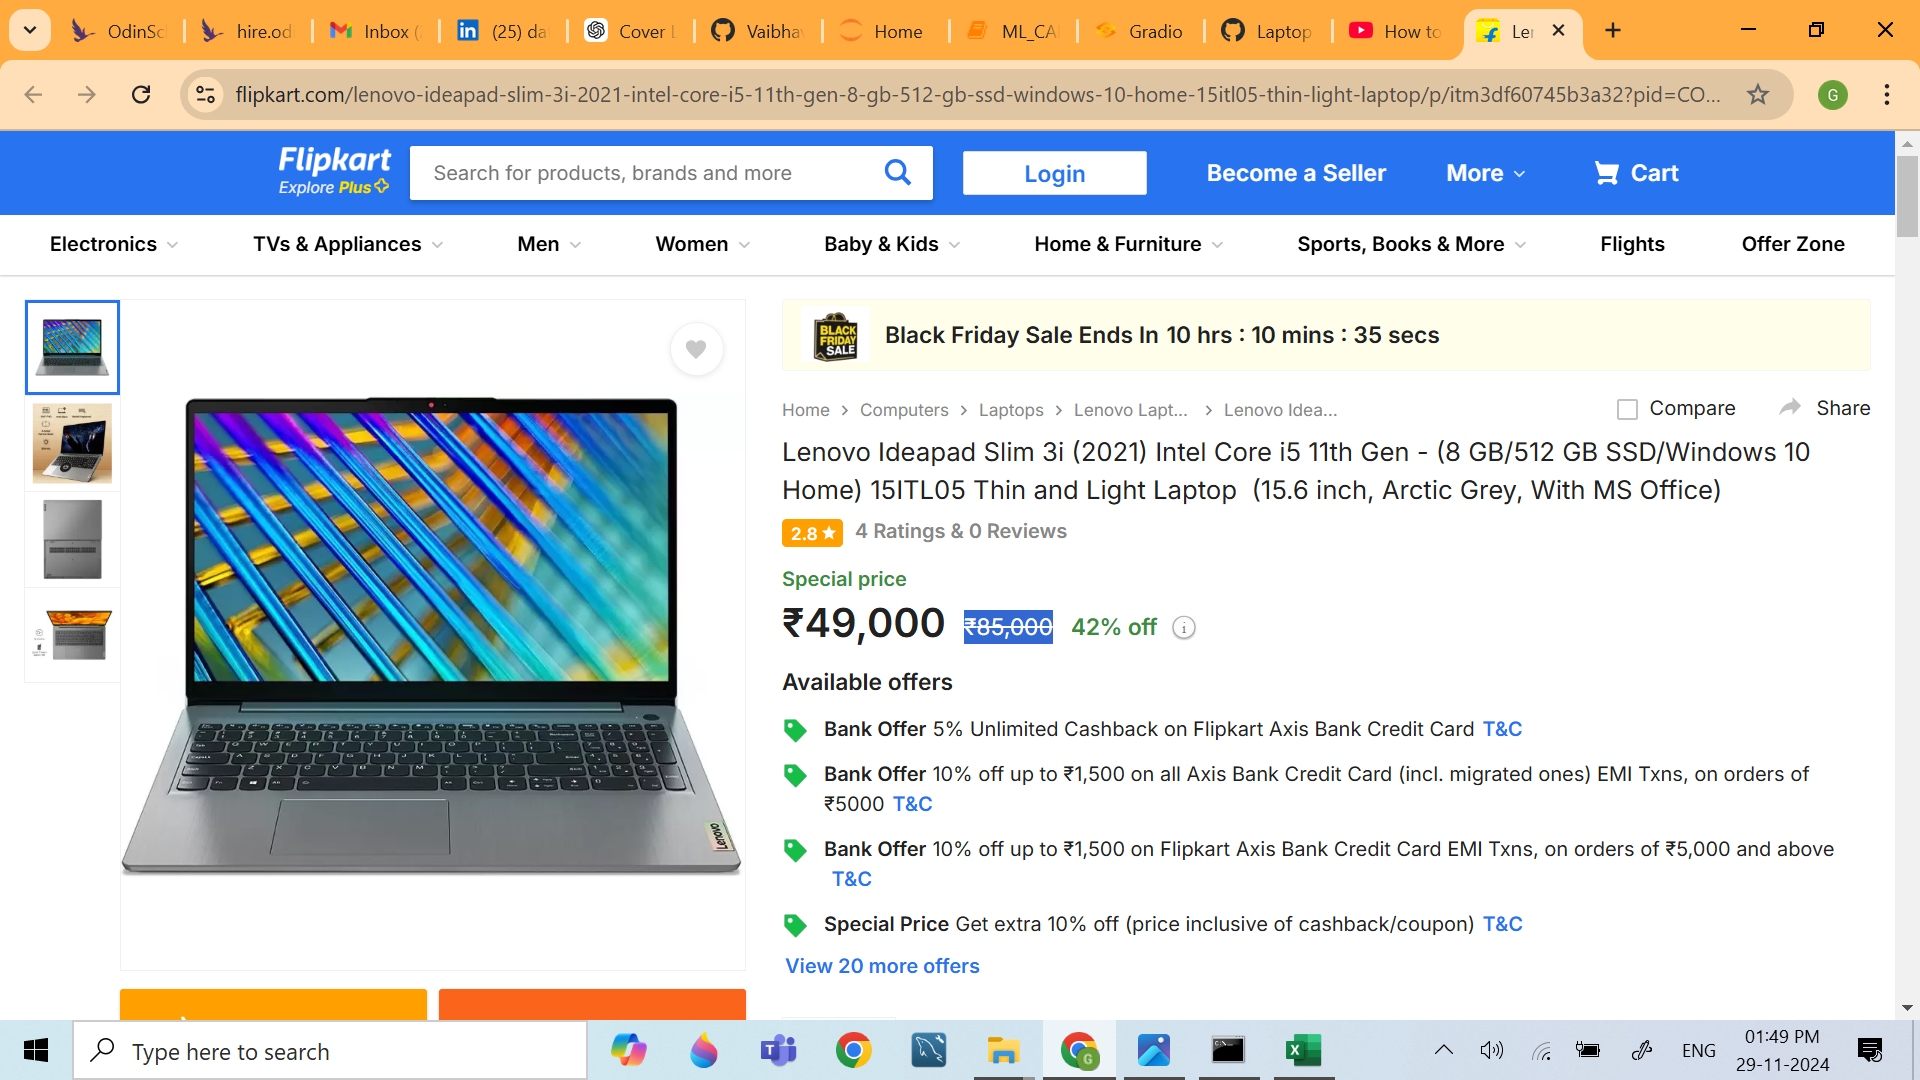

In [3]:
from IPython.display import Image
Image(filename=r'C:\Users\Krishnapriya V\Downloads\GINTU ODINSCHOOL STUDY MATERIAL\ML\CAPSTONE PROJECT\ML_CAPSTONE_PROJECT\Untitled1.png')
# Display an image from a file
Image(filename=r'C:\Users\Krishnapriya V\Downloads\GINTU ODINSCHOOL STUDY MATERIAL\ML\CAPSTONE PROJECT\ML_CAPSTONE_PROJECT\Untitled.png')
# Hyperlink: https://www.flipkart.com/lenovo-ideapad-slim-3i-2021-intel-core-i5-11th-gen-8-gb-512-gb-ssd-windows-10-home-15itl05-thin-light-laptop/p/itm3df60745b3a32?pid=COMG85NJRMG2XMRP&lid=LSTCOMG85NJRMG2XMRPZGXIZG&marketplace=FLIPKART&cmpid=content_computer_8965229628_gmc

# Conclusion
    * By creating an end-to-end machine learning solution, we empower users to make informed decisions when buying or selling laptops. Whether you’re a data science enthusiast or a laptop shopper, this project provides valuable insights into laptop pricing trends.
    * Feel free to explore the code and dive deeper into the world of laptop price prediction using Machine Learning! 